<a href="https://colab.research.google.com/github/WojciechSokolowski/Qiskit_Projects/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qutip

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def gaussian(t, t_M, sigma):

    return 1./(sigma*math.sqrt(2*np.pi))*math.exp(-(((t-t_M)**2)/(2*sigma**2)))


def oper(t,args):
  return -1/2 * args['omega1'] * (np.cos(args['omega']*t)*sigmax() - np.sin(args['omega']*t)*sigmay()) - 1/2 * args['omega0'] * sigmaz()


def h_not(t,args):
  return args['theta']/2 * gaussian(t,args['t_M'],args['sigma']) * sigmax()

def h_u(t,args):
  return args['theta']/2*gaussian(t,args['t_M'],args['sigma']) * (tensor(sigmax(),sigmax()) + tensor(sigmay(),sigmay()) + tensor(sigmaz(),sigmaz())  )

In [ ]:
up = qutip.basis(2, 0)


In [ ]:
args={'omega' : 1, 'omega0' : 1, 'omega1' : 1}
H_t = QobjEvo(oper,args=args)
timelist=np.linspace(0,20,2001)
list_of_operators = []
list_of_operators.append(sigmax())
list_of_operators.append(sigmay())
list_of_operators.append(sigmaz())
list_of_operators.append(basis(2, 0).proj())
list_of_operators.append(basis(2, 1).proj())

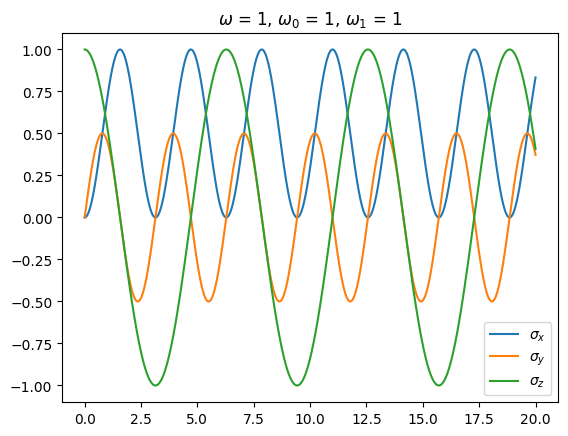

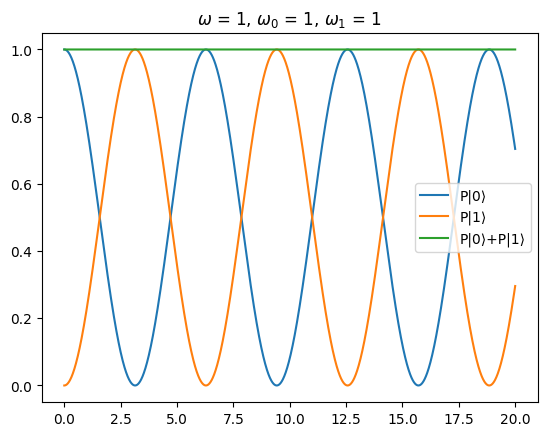

In [ ]:
resoults = sesolve(H_t,up,timelist,list_of_operators)

plt.title("$\omega$ = " + str(args['omega'])+", $\omega_0$ = " + str(args['omega0']) + ", $\omega_1$ = " + str(args['omega1']))
plt.plot(timelist,resoults.expect[0],label='$\sigma_x$')
plt.plot(timelist,resoults.expect[1],label='$\sigma_y$')
plt.plot(timelist,resoults.expect[2],label='$\sigma_z$')
plt.legend()
plt.show()

plt.title("$\omega$ = " + str(args['omega'])+", $\omega_0$ = " + str(args['omega0']) + ", $\omega_1$ = " + str(args['omega1']))
plt.plot(timelist,resoults.expect[3],label="P|0⟩")
plt.plot(timelist,resoults.expect[4],label="P|1⟩")
plt.plot(timelist,resoults.expect[3]+resoults.expect[4],label="P|0⟩+P|1⟩")
plt.legend()
plt.show()

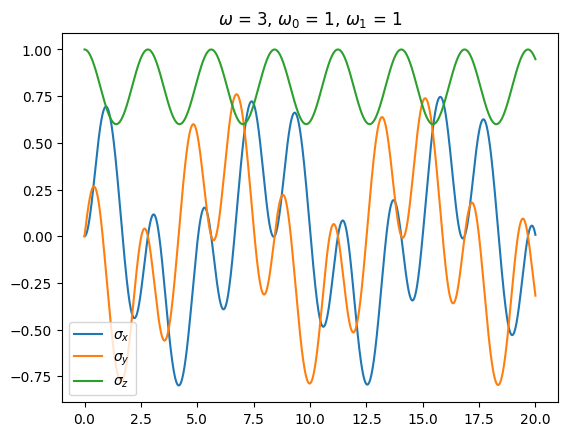

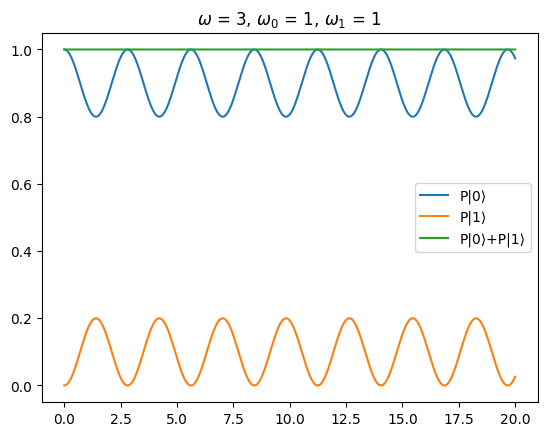

In [ ]:
args={'omega' : 3, 'omega0' : 1, 'omega1' : 1}
H_t = QobjEvo(oper,args=args)
resoults = sesolve(H_t,up,timelist,list_of_operators)

plt.title("$\omega$ = " + str(args['omega'])+", $\omega_0$ = " + str(args['omega0']) + ", $\omega_1$ = " + str(args['omega1']))
plt.plot(timelist,resoults.expect[0],label='$\sigma_x$')
plt.plot(timelist,resoults.expect[1],label='$\sigma_y$')
plt.plot(timelist,resoults.expect[2],label='$\sigma_z$')
plt.legend()
plt.show()


plt.title("$\omega$ = " + str(args['omega'])+", $\omega_0$ = " + str(args['omega0']) + ", $\omega_1$ = " + str(args['omega1']))
plt.plot(timelist,resoults.expect[3],label="P|0⟩")
plt.plot(timelist,resoults.expect[4],label="P|1⟩")
plt.plot(timelist,resoults.expect[3]+resoults.expect[4],label="P|0⟩+P|1⟩")
plt.legend()
plt.show()

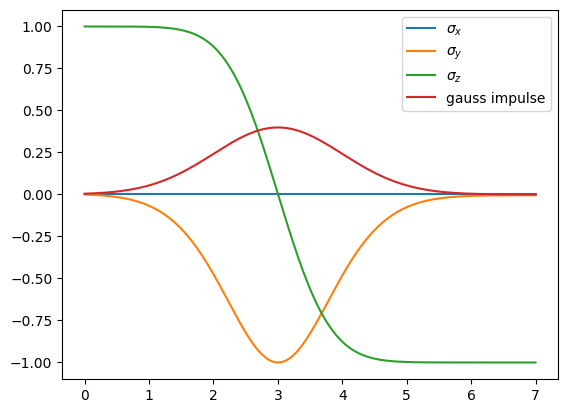

In [ ]:
args2 = {'sigma' : 1,'t_M' : 3, 'theta' : math.pi}
timelist=np.linspace(0,7,701)
#impulse = QobjEvo(gaussian_impulse,args=args2)
glist=np.zeros(701)
for i in range(len(glist)):
  glist[i]=gaussian(timelist[i],args2['t_M'],args2['sigma'])







list_of_operators = []
list_of_operators.append(sigmax())
list_of_operators.append(sigmay())
list_of_operators.append(sigmaz())

H_t = QobjEvo(h_not,args=args2)
resoults = sesolve(H_t,up,timelist,list_of_operators)
plt.plot(timelist,resoults.expect[0],label='$\sigma_x$')
plt.plot(timelist,resoults.expect[1],label='$\sigma_y$')
plt.plot(timelist,resoults.expect[2],label='$\sigma_z$')
plt.plot(timelist,glist,label='gauss impulse')


plt.legend()
plt.show()

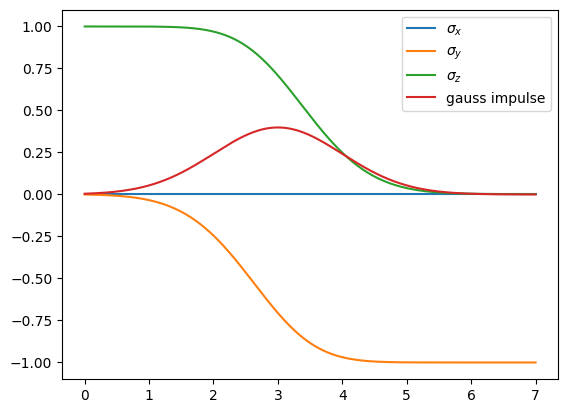

In [ ]:
args2['theta'] = math.pi/2

H_t = QobjEvo(h_not,args=args2)
resoults = sesolve(H_t,up,timelist,list_of_operators)

glist=np.zeros(701)
for i in range(len(glist)):
  glist[i]=gaussian(timelist[i],args2['t_M'],args2['sigma'])





plt.plot(timelist,resoults.expect[0],label='$\sigma_x$')
plt.plot(timelist,resoults.expect[1],label='$\sigma_y$')
plt.plot(timelist,resoults.expect[2],label='$\sigma_z$')
plt.plot(timelist,glist,label='gauss impulse')

plt.legend()
plt.show()

In [ ]:
psi_00 = tensor(basis(2,0),basis(2,0))
psi_01 = tensor(basis(2,0),basis(2,1))
psi_10 = tensor(basis(2,1),basis(2,0))
psi_11 = tensor(basis(2,1),basis(2,1))

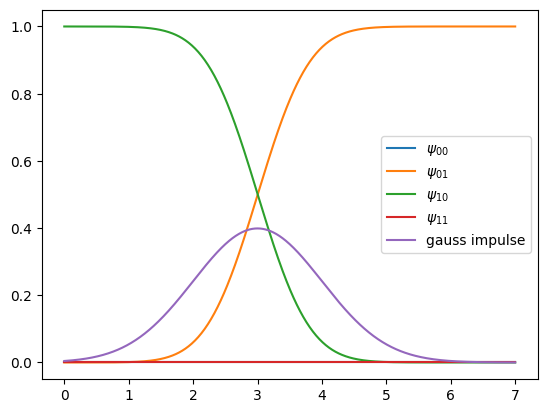

In [ ]:
args2['sigma'] = 1
args2['theta'] = math.pi/2
list_of_operators = []
list_of_operators.append(psi_00.proj())
list_of_operators.append(psi_01.proj())
list_of_operators.append(psi_10.proj())
list_of_operators.append(psi_11.proj())


H_t = QobjEvo(h_u,args=args2)
resoults = sesolve(H_t,psi_10,timelist,list_of_operators)

glist=np.zeros(701)
for i in range(len(glist)):
  glist[i]=gaussian(timelist[i],args2['t_M'],args2['sigma'])



plt.plot(timelist,resoults.expect[0],label='$\psi_{00}$')
plt.plot(timelist,resoults.expect[1],label='$\psi_{01}$')
plt.plot(timelist,resoults.expect[2],label='$\psi_{10}$')
plt.plot(timelist,resoults.expect[3],label='$\psi_{11}$')
plt.plot(timelist,glist,label='gauss impulse')
plt.legend()
plt.show()